# Surfingcrypto `Portfolio`

The `surfingcrypto` portfolio.

In [1]:
%load_ext autoreload
%autoreload 2
from surfingcrypto import Config
from surfingcrypto.portfolio import Portfolio
from surfingcrypto.portfolio.tracker import Tracker

import pandas as pd

In [2]:
c = Config("/Users/giorgiocaizzi/Documents/GitHub/surfingcrypto/config")



In [3]:
p = Portfolio("coinbase", configuration=c)



Warning! There are 5 transactionsthat were EXCLUDED in std_df.
Coinbase errors:
TransactionsHistory(Transactions:186 - Processed:186, Unhandled:0 - Errors:9)


In [4]:
p.std_df.head(10)


,type,amount,symbol,native_amount,nat_symbol,total,subtotal,total_fee,spot_price,trade_id
datetime,,,,,,,,,,
2018-10-22T06:29:22Z,buy,0.017237,BTC,100.00,EUR,100.00,97.01,2.99,5627.999719,None
2018-10-22T06:29:22Z,buy,100.000000,EUR,100.00,EUR,NaN,NaN,NaN,1.000000,None
2018-11-09T12:05:12Z,sell,0.017237,BTC,93.27,EUR,93.27,96.26,2.99,5584.488743,None
2018-11-09T12:05:13Z,sell,93.270000,EUR,93.27,EUR,NaN,NaN,NaN,1.000000,None
2018-11-09T12:06:14Z,buy,348.021666,BAT,93.27,EUR,93.27,90.28,2.99,0.259409,None
2018-11-09T12:06:15Z,buy,93.270000,EUR,93.27,EUR,NaN,NaN,NaN,1.000000,None
2019-01-25T14:28:56Z,sell,35.960000,EUR,35.96,EUR,NaN,NaN,NaN,1.000000,None
2019-01-25T14:28:56Z,sell,348.021666,BAT,35.96,EUR,35.96,37.95,1.99,0.109045,None
2021-04-20T18:57:40Z,buy,0.258429,ETH,500.00,EUR,500.00,492.66,7.34,1906.364408,None


In [5]:
p.std_df.total_fee.sum()


234.18000000000026

## Portfolio total investment`
Gets total investment buy summing up `fiat_deposit` and `fiat_withdrawal` investment.

<div class="alert alert-info">

Note

At the moment, when buying with a credit card, the transaction is not registered as `fiat_deposit` and so it is not included in this calculation.

</div>

In [6]:
p.coinbase.history.df[
    p.coinbase.history.df.type.isin(["fiat_deposit", "fiat_withdrawal"])
].groupby("type")[["amount"]].sum()



,amount
type,
fiat_deposit,1050.00
fiat_withdrawal,-35.96


## Portfolio live value tracker

In [126]:
t = Tracker(p.std_df, stocks_start="1-1-2021", configuration=c)



### Load closedata log

Error log from loading data.

In [127]:
t.closedata

,Date,Close,symbol
0,2017-10-01 00:00:00+00:00,3729.454806,BTC
1,2017-10-02 00:00:00+00:00,3758.690499,BTC
2,2017-10-03 00:00:00+00:00,3675.702350,BTC
3,2017-10-04 00:00:00+00:00,3597.924171,BTC
4,2017-10-05 00:00:00+00:00,3695.389871,BTC
...,...,...,...
8031,2022-03-12 00:00:00+00:00,74.724013,SOL
8032,2022-03-13 00:00:00+00:00,72.208351,SOL
8033,2022-03-14 00:00:00+00:00,74.179038,SOL
8034,2022-03-15 00:00:00+00:00,75.640441,SOL


In [128]:
t.error_log


[]

### Set benchmark

Set coin as benchmark.

In [129]:
benchmark = t.set_benchmark("BTC")
benchmark.head()


,Close
Date,
2017-10-01 00:00:00+00:00,3729.454806
2017-10-02 00:00:00+00:00,3758.690499
2017-10-03 00:00:00+00:00,3675.702350
2017-10-04 00:00:00+00:00,3597.924171
2017-10-05 00:00:00+00:00,3695.389871


#### Portfolio start balance

Tracker module allows to consider transactions happened before the `stocks_start` date specified.

This is done adjusting past positions to the current value at `stocks_start` date.

In [130]:
t.active_positions.head()


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share
8,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408
10,2021-04-22 10:13:53+00:00,buy,0.062128,MKR,250.00,3964.873854
13,2021-04-22 19:20:15+00:00,sell,0.062128,MKR,213.69,3491.496921
14,2021-04-24 08:53:47+00:00,buy,210.343863,ADA,213.69,1.000980
16,2021-04-25 16:15:33+00:00,buy,0.350116,CGLD,1.65,4.712730


#### Daily snapshots

The module produces daily snapshots of the portfolio balance.

In [131]:
t.daily_snapshots[-1]


,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot
160,2021-08-26 19:45:55+00:00,buy,257.829804,MATIC,1360.65,1.174154,2022-03-16 00:00:00+00:00
162,2021-09-07 10:00:18+00:00,buy,72.073991,ADA,389.49,2.166873,2022-03-16 00:00:00+00:00
164,2021-09-09 23:30:55+00:00,buy,323.271703,ADA,692.45,2.142006,2022-03-16 00:00:00+00:00
156,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-16 00:00:00+00:00
166,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-16 00:00:00+00:00
170,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-16 00:00:00+00:00
172,2021-12-23 07:28:57+00:00,buy,1.001178,AAVE,195.57,195.339958,2022-03-16 00:00:00+00:00


### Portfolio calculations

In [132]:
l=0
for d in t.daily_snapshots:
    if not d.empty:
        l+=len(d)
print(l)

1595


In [133]:
combined_df = t.per_day_portfolio_calcs(benchmark,)
combined_df

,Open date,Type,Qty,Symbol,Adj cost,Adj cost per share,Date Snapshot,Symbol Adj Close,Adj cost daily,Benchmark Close,Benchmark DayOfBuy Close,Benchmark Equiv Shares,Benchmark Adj Cost Daily,symbol Return,Stock Gain / (Loss),Benchmark Return,Benchmark Gain / (Loss)
0,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-20 00:00:00+00:00,1936.596366,500.472817,46933.720614,46933.720614,0.010653,500.000000,0.015858,7.812817,0.000000,5.684342e-14
1,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-21 00:00:00+00:00,1964.593249,507.708026,44784.207639,46933.720614,0.010653,477.100548,0.030544,15.048026,-0.045799,-2.289945e+01
2,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-22 00:00:00+00:00,2000.536891,516.996908,43083.343659,46933.720614,0.010653,458.980698,0.049399,24.336908,-0.082039,-4.101930e+01
3,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-23 00:00:00+00:00,1953.619811,504.872170,42231.405901,46933.720614,0.010653,449.904731,0.024788,12.212170,-0.100191,-5.009527e+01
4,2021-04-20 18:57:40+00:00,buy,0.258429,ETH,500.00,1906.364408,2021-04-24 00:00:00+00:00,1828.220570,472.465360,41374.099753,46933.720614,0.010653,440.771573,-0.040991,-20.194640,-0.118457,-5.922843e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,2021-09-09 23:30:55+00:00,buy,323.271703,ADA,692.45,2.142006,2022-03-16 00:00:00+00:00,0.760652,245.897294,37329.639047,39233.226410,0.017650,658.852481,-0.644888,-446.552706,-0.048520,-3.359752e+01
1591,2021-08-21 18:49:29+00:00,buy,0.006479,USDC,1117.38,0.854942,2022-03-16 00:00:00+00:00,0.907199,0.005878,37329.639047,41810.282011,0.026725,997.634794,0.061124,0.000339,-0.107166,-1.197452e+02
1592,2021-11-29 10:44:04+00:00,buy,21.493860,SUSHI,147.19,6.848002,2022-03-16 00:00:00+00:00,2.823029,60.677799,37329.639047,51189.448581,0.002875,107.337542,-0.587759,-86.512201,-0.270755,-3.985246e+01
1593,2021-12-23 07:27:08+00:00,buy,13.238243,UNI,195.91,14.798792,2022-03-16 00:00:00+00:00,8.251318,109.232955,37329.639047,44849.704694,0.004368,163.061265,-0.442433,-86.677045,-0.167673,-3.284873e+01


In [134]:
import matplotlib.pyplot as plt


In [135]:
t.daily_grouped_metrics(combined_df,
    ["Adj cost daily"])

,value
variable,Adj cost daily
Date Snapshot,
2021-04-20,500.472817
2021-04-21,507.708026
2021-04-22,516.996908
2021-04-23,504.872170
2021-04-24,663.967701
...,...
2022-03-12,887.741092
2022-03-13,868.146213


## Portfolio daily value

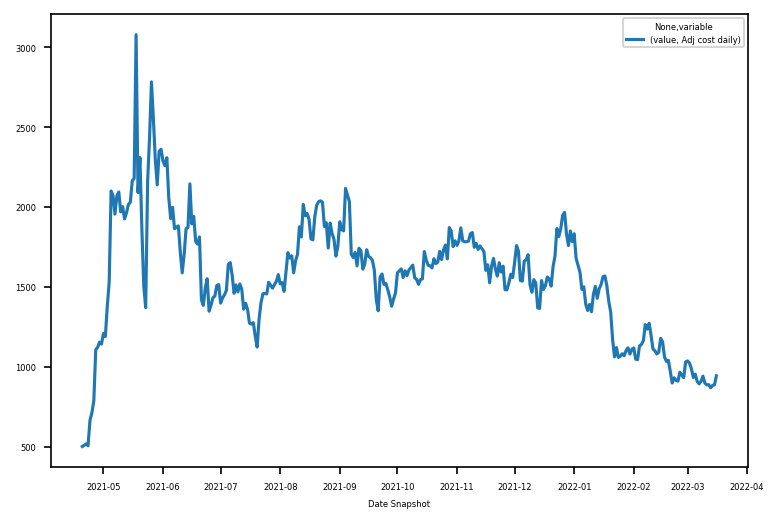

In [136]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Adj cost daily"]
    ).plot(ax=ax)

## Portfolio gain/loss

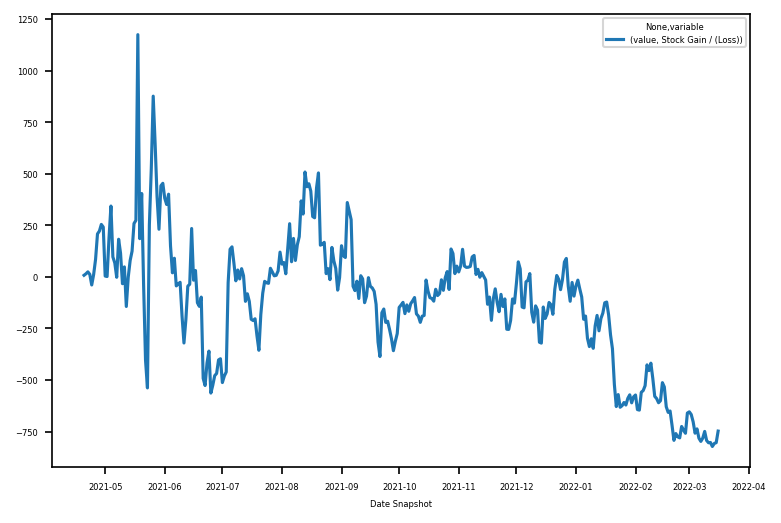

In [137]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Stock Gain / (Loss)"]
    ).plot(ax=ax)

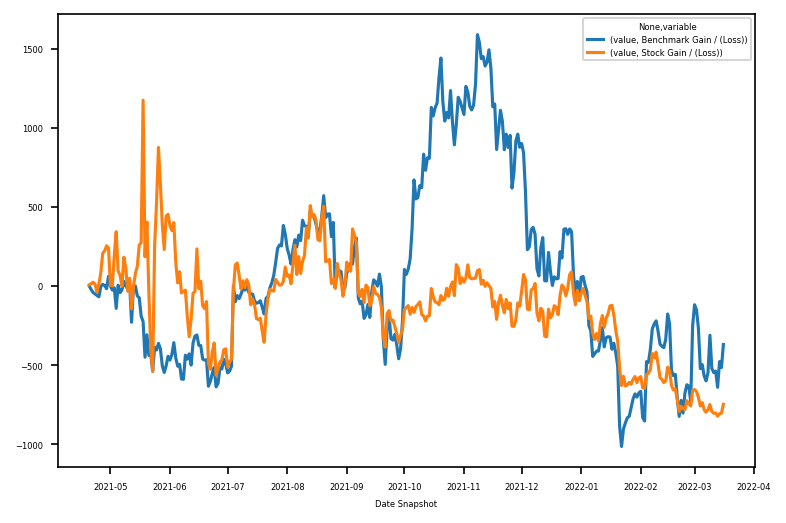

In [138]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(combined_df,
    ["Stock Gain / (Loss)","Benchmark Gain / (Loss)"]
    ).plot(ax=ax)

### Portfolio value by symbol


In [139]:
t.daily_grouped_metrics(
    combined_df,
    ["Adj cost daily"],
    by_symbol=True
    ).tail()

value                                               \
Symbol                  AAVE            ACH            ADA            AMP   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-12        110.407132            NaN     286.411535            NaN   
2022-03-13        106.304138            NaN     286.063582            NaN   
2022-03-14        108.394041            NaN     290.439773            NaN   
2022-03-15        111.342977            NaN     288.390563            NaN   
2022-03-16        128.666204            NaN     300.720525            NaN   

                                                                           \
Symbol                  COMP            ETC            ETH           MANA   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-12               NaN            NaN            NaN            NaN   
2022-03-13               NaN            NaN            NaN            NaN   
2022-03-14               NaN            NaN            NaN            NaN   
2022-03-15               NaN            NaN            NaN            NaN   
2022-03-16               NaN            NaN            NaN            NaN   

                                                                           \
Symbol                 MATIC            QNT            SOL          SUSHI   
variable      Adj cost daily Adj cost daily Adj cost daily Adj cost daily   
Date Snapshot                                                               
2022-03-12        330.610869            NaN            NaN      57.409285   
2022-03-13        321.441119            NaN            NaN      54.938047   
2022-03-14        324.652231            NaN            NaN      56.715679   
2022-03-15        324.477736            NaN            NaN      57.398052   
2022-03-16        343.489462            NaN            NaN      60.677799   

                                                            
Symbol                   UNI           USDC           USDT  
variable      Adj cost daily Adj cost daily Adj cost daily  
Date Snapshot                                               
2022-03-12        102.896338       0.005934            NaN  
2022-03-13         99.393400       0.005927            NaN  
2022-03-14        102.681028       0.005922            NaN  
2022-03-15        105.081948       0.005904            NaN  
2022-03-16        109.232955       0.005878            NaN

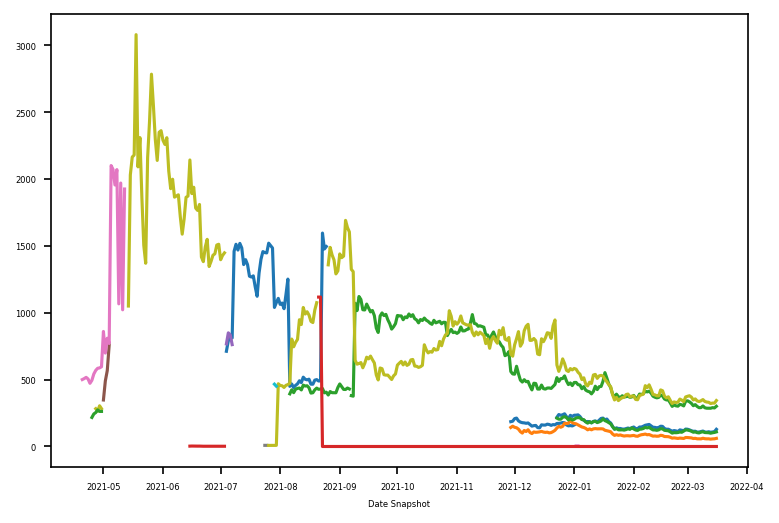

In [140]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    combined_df,
    ["Adj cost daily"],
    by_symbol=True
    ).plot(ax=ax,legend=False)

### Stock gain by symbol

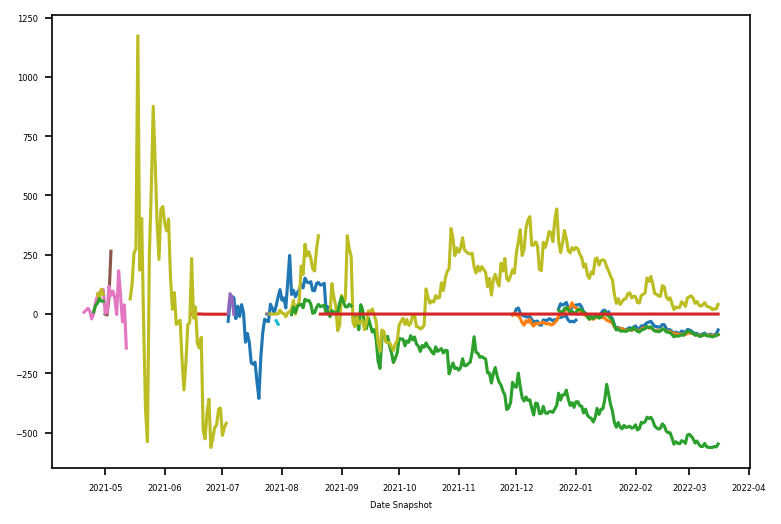

In [141]:
f, ax = plt.subplots(dpi=150)
t.daily_grouped_metrics(
    combined_df,
    ["Stock Gain / (Loss)"],
    by_symbol=True
    ).plot(ax=ax,legend=False)

### Multiple variables by symbols

In [142]:
t.daily_grouped_metrics(
    combined_df, ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    ).tail()

value                      \
Symbol                           AAVE                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-12                 -40.133525          -85.162868   
2022-03-13                 -44.590989          -89.265862   
2022-03-14                 -37.504490          -87.175959   
2022-03-15                 -39.156363          -84.227023   
2022-03-16                 -32.791726          -66.903796   

                                                           \
Symbol                            ACH                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-12                        NaN                 NaN   
2022-03-13                        NaN                 NaN   
2022-03-14                        NaN                 NaN   
2022-03-15                        NaN                 NaN   
2022-03-16                        NaN                 NaN   

                                                           \
Symbol                            ADA                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-12                -101.507089         -562.213627   
2022-03-13                -129.623038         -562.561579   
2022-03-14                 -84.924152         -558.185388   
2022-03-15                 -95.343528         -560.234599   
2022-03-16                 -55.197872         -547.904637   

                                                           \
Symbol                            AMP                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-12                        NaN                 NaN   
2022-03-13                        NaN                 NaN   
2022-03-14                        NaN                 NaN   
2022-03-15                        NaN                 NaN   
2022-03-16                        NaN                 NaN   

                                                           ...  \
Symbol                           COMP                      ...   
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)  ...   
Date Snapshot                                              ...   
2022-03-12                        NaN                 NaN  ...   
2022-03-13                        NaN                 NaN  ...   
2022-03-14                        NaN                 NaN  ...   
2022-03-15                        NaN                 NaN  ...   
2022-03-16                        NaN                 NaN  ...   

                                                           \
Symbol                            SOL                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-12                        NaN                 NaN   
2022-03-13                        NaN                 NaN   
2022-03-14                        NaN                 NaN   
2022-03-15                        NaN                 NaN   
2022-03-16                        NaN                 NaN   

                                                           \
Symbol                          SUSHI                       
variable      Benchmark Gain / (Loss) Stock Gain / (Loss)   
Date Snapshot                                               
2022-03-12                 -44.693710          -89.780715   
2022-03-13                 -47.633004          -92.251953   
2022-03-14                 -42.960099          -90.474321   
2022-03-15                 -44.049360          -89.791948   
2022-03-16                 -39.852458          -86.512201   

                                                           \
Symbol                            UNI                       
variable      B

In [143]:
len(uniqs)

30

In [144]:
len(uniqs)//3+len(uniqs)%3

10

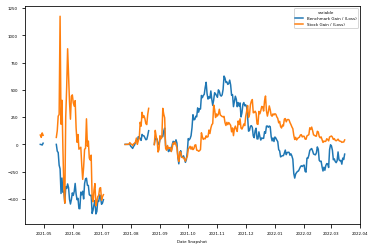

In [145]:
t.daily_grouped_metrics(
    combined_df, ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    )[("value","MATIC")].plot()

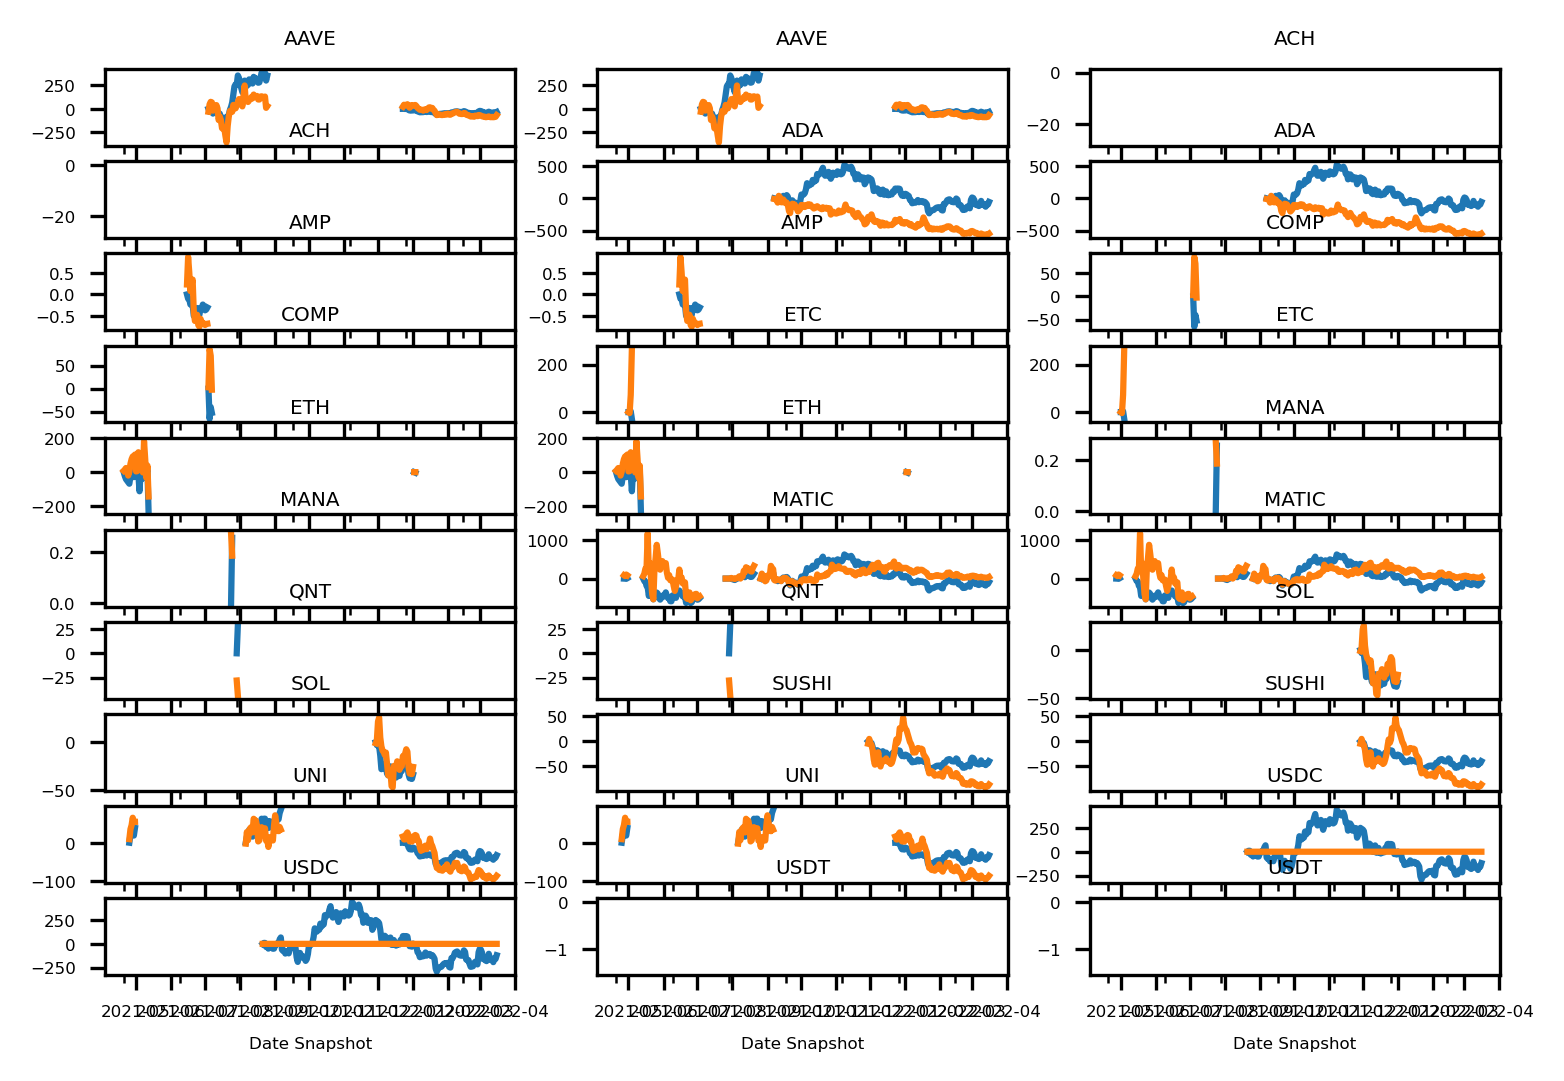

In [146]:
uniqs=t.daily_grouped_metrics(
    combined_df, ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    ).columns.get_level_values(1)
plt.rcParams.update({'font.size': 4})
f,axes=plt.subplots(ncols=3,nrows=len(uniqs)//3+len(uniqs)%3,dpi=300,sharex=True)
for coin,ax in zip(uniqs,axes.flatten()):
    t.daily_grouped_metrics(
    combined_df, ["Benchmark Gain / (Loss)","Stock Gain / (Loss)"],
    by_symbol=True
    )[("value",coin)].plot(ax=ax,legend=False)
    ax.set_title(coin)

#### Calplot

see investment throughout time.

In [147]:
t.daily_grouped_metrics(combined_df,["Adj cost daily"])[("value")]

variable,Adj cost daily
Date Snapshot,
2021-04-20,500.472817
2021-04-21,507.708026
2021-04-22,516.996908
2021-04-23,504.872170
2021-04-24,663.967701
...,...
2022-03-12,887.741092
2022-03-13,868.146213
2022-03-14,882.888676


In [148]:
# import calplot
# from surfingcrypto.reporting.plotting import shiftedColorMap
# import matplotlib.cm as cm
# from matplotlib.colors import Normalize, LinearSegmentedColormap
# value=t.daily_grouped_metrics(combined_df,["Adj cost daily"]).set_index("Date Snapshot")[["value"]]
# norm = Normalize(vmin=value["value"].min(), vmax=value["value"].max())
# cmap = shiftedColorMap(
#     LinearSegmentedColormap.from_list(
#         "colorbar",
#         [
#             "darkred",
#             "red",
#             "orange",
#             "grey",
#             "lightgreen",
#             "green",
#             "darkgreen",
#         ],
#     ),
#     midpoint=norm(
#         p.coinbase.history.df[
#             p.coinbase.history.df.type.isin(
#                 ["fiat_deposit", "fiat_withdrawal"]
#             )
#         ]
#         .groupby("type")[["amount"]]
#         .sum()
#         .reset_index()["amount"]
#         .sum()
#     ),
# )
# c = calplot.calplot(
#     value,
#     cmap=cmap
#     )

